# Compte-Rendu de Travail :

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import csv

J'ai commencé par fusionner les différents csv, pour pouvoir travailler sur un seul et même fichier, grâce à la commande :
                                    // cat *.csv > combined.csv //

In [165]:
data = pd.read_csv('csv/combined.csv', sep=';')
print(data.head())

    id_mutation date_mutation  numero_disposition nature_mutation  \
0   2022-360375    21/04/2022                   1           Vente   
1   2022-360375    21/04/2022                   1           Vente   
2  2021-1180016    10/05/2021                   1           Vente   
3  2021-1177880    14/01/2021                   1           Vente   
4  2021-1177880    14/01/2021                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe      adresse_nom_voie  \
0         260000.0            26.0            None           RUE DELILLE   
1         260000.0            26.0            None           RUE DELILLE   
2         160000.0            13.0            None  RUE ALFRED DE MUSSET   
3         174000.0            21.0            None     RUE PAUL VERLAINE   
4         174000.0            21.0            None     RUE PAUL VERLAINE   

  adresse_code_voie code_postal  ...  surface_reelle_bati  \
0               582       76800  ...                129.0   
1     

On peut cibler directement les colonnes que l'on souhaite garder, qui nous semble pertinentes :

C:\Users\simon\AppData\Local\Temp\ipykernel_63932\3562252322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat_corr = data.corr()


<AxesSubplot: >

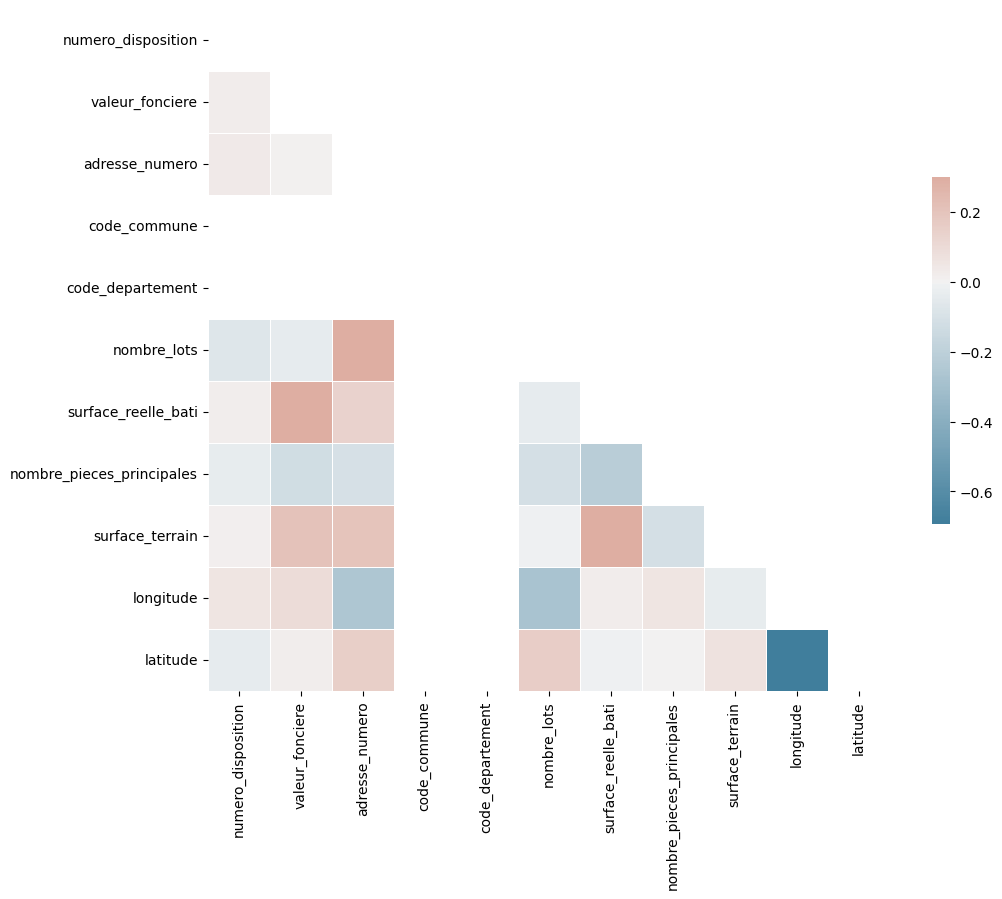

In [166]:
mat_corr = data.corr()
mask = np.triu(np.ones_like(mat_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

On voit bien avec la matrice de corrélation, l'importance de chaque caractéristique. On peut donc enlever les non-pertinentes :

In [167]:
data = data.drop(['adresse_suffixe', 'id_mutation', 'nature_mutation', 'code_commune', 'code_departement', 'nombre_lots', 'numero_disposition', 'code_commune', 'code_departement', 'nom_commune', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_type_local', 'code_nature_culture', 'code_nature_culture_speciale', 'nature_culture'], axis=1)

On peut remarquer qu'il y a beaucoup de "None", dans certaines colonnes. Comme elles n'apportaient que peu d'information, j'ai décidé de les retirer pour faciliter le traitement des données :

In [191]:
data.dropna(inplace=True)
data.reset_index(drop=True)
print(data)

     date_mutation  valeur_fonciere  adresse_numero  \
0       21/04/2022         260000.0            26.0   
2       10/05/2021         160000.0            13.0   
3       14/01/2021         174000.0            21.0   
5       10/03/2020         200000.0             2.0   
6       10/03/2020         200000.0             2.0   
...            ...              ...             ...   
2951    01/09/2017         189300.0            20.0   
2964    19/06/2019              1.2           520.0   
2968    28/12/2018        1000000.0          9010.0   
2969    28/12/2018        1000000.0          9010.0   
2971    28/06/2018         665000.0           165.0   

                 adresse_nom_voie adresse_code_voie code_postal  \
0                     RUE DELILLE               582       76800   
2            RUE ALFRED DE MUSSET                40       76800   
3               RUE PAUL VERLAINE              1920       76800   
5                RUE DU MADRILLET              1580       76800   
6   

Après avoir nettoyé ces données, on va pouvoir les afficher :